# CLASSIFICATION PROBLEM USING THE PRIMA INDIA DATASET

In [2]:
import os
os.chdir(r"C:\Users\User\OneDrive\Documents\Data Science 2025.2026")
os.getcwd()

'C:\\Users\\User\\OneDrive\\Documents\\Data Science 2025.2026'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

We first need to load the dataset from url

In [4]:
# 1. LOAD & CLEAN
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
df = pd.read_csv(url, names=col_names)

**Using the medium, we need to impute the missing values, especially for variables like blood pressure, glucose, and insulin, which cannot be zero.** 

In [5]:
# Impute missing values with median
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
for col in cols_to_fix:
    df[col] = df[col].fillna(df[col].median())

In [6]:
# 2. DEFINE FEATURES (X) AND TARGET (y)
X = df.drop('Outcome', axis=1) # All columns except Outcome
y = df['Outcome']              # The Target (0 = Healthy, 1 = Diabetic)

In [7]:
# 3. SPLIT DATA (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 4. TRAIN MODEL
# max_iter=1000 ensures the math has time to converge
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
# 5. EVALUATE
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"--- Model Accuracy: {accuracy:.2%}") # Formats as percentage
print("\n--- Classification Report ---")
print(classification_report(y_test, predictions))

--- Model Accuracy: 75.32%

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



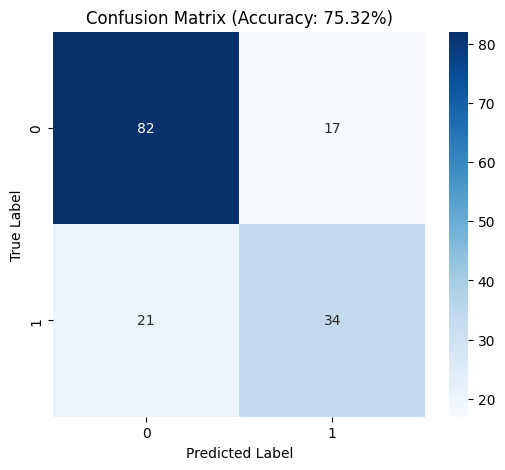

In [10]:
# 6. VISUALIZE CONFUSION MATRIX
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2%})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Interpretation
1. Model Accuracy: 75.32% 
2. Recall: 0.62; out of 100 people who actually have diabetes, the model correctly catches 62 of them. It misses 38.
